![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<div style="font-family: Times New Roman; font-size: 1.0em;">

<b>Questão 1:</b> <br>

a) Escolha um intervalo de valores de I que vá de valores abaixo de I L , a menor corrente
capaz de produzir disparos (veja a Seção 3.1 das notas de aula “Modelos de neurônios
de tipo integra-e-dispara”), até valores que façam a taxa de disparos do neurônio ficar
em torno de 150 Hz. Faça uma varredura por valores de I dentro desse intervalo para
gerar o gráfico da função f-I do neurônio LIF. Apresente seu gráfico mostrando a curva
f-I obtida numericamente e a curva f-I analı́tica deduzida nas notas de aula.<br>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Integra_Dispara import IntegraDispara

In [2]:
def count_spikes(V, V_th):
    """Counts the number of spikes in a voltage trace.

    Parameters
    ----------
    V : numpy.ndarray
        Voltage trace.
    V_th : float
        Threshold voltage, in mV.
    """
    times_spikes = np.where((V[1:] >= V_th) & (V[:-1] < V_th))[0]

    return times_spikes

In [3]:
inj_currents = np.arange(0, 1.3, 0.1)
runner = IntegraDispara(exp_time=2)

all_spikes = []
for j in inj_currents:
    V, inj_values = runner.run(J=[j], times=[(0, 2)], plot=False)
    spikes = len(count_spikes(V, -50))

    print(f"J = {j}")
    print(f"Number of spikes: {spikes}")
    all_spikes.append(spikes)

100%|██████████| 2000/2000 [00:00<00:00, 196578.82it/s]


J = 0.0
Number of spikes: 0


100%|██████████| 2000/2000 [00:00<00:00, 224907.72it/s]


J = 0.1
Number of spikes: 52


100%|██████████| 2000/2000 [00:00<00:00, 226199.49it/s]


J = 0.2
Number of spikes: 104


100%|██████████| 2000/2000 [00:00<00:00, 226089.75it/s]


J = 0.30000000000000004
Number of spikes: 153


100%|██████████| 2000/2000 [00:00<00:00, 193709.92it/s]


J = 0.4
Number of spikes: 199


100%|██████████| 2000/2000 [00:00<00:00, 216922.45it/s]


J = 0.5
Number of spikes: 249


100%|██████████| 2000/2000 [00:00<00:00, 178253.46it/s]


J = 0.6000000000000001
Number of spikes: 285


100%|██████████| 2000/2000 [00:00<00:00, 194293.18it/s]


J = 0.7000000000000001
Number of spikes: 332


100%|██████████| 2000/2000 [00:00<00:00, 204405.76it/s]


J = 0.8
Number of spikes: 399


100%|██████████| 2000/2000 [00:00<00:00, 174232.71it/s]


J = 0.9
Number of spikes: 399


100%|██████████| 2000/2000 [00:00<00:00, 183570.21it/s]


J = 1.0
Number of spikes: 499


100%|██████████| 2000/2000 [00:00<00:00, 210288.24it/s]


J = 1.1
Number of spikes: 499


100%|██████████| 2000/2000 [00:00<00:00, 178446.85it/s]

J = 1.2000000000000002
Number of spikes: 499


In [4]:
F_lif = lambda i: 1/(0.01 * np.log((-70 + 100 * i + 80)/(-70 + 100 * i + 50)))
v = np.linspace(0.2, 1.2, 100)

F_lif_val = F_lif(v)

/tmp/ipykernel_205903/1351910953.py:1: RuntimeWarning: divide by zero encountered in true_divide
  F_lif = lambda i: 1/(0.01 * np.log((-70 + 100 * i + 80)/(-70 + 100 * i + 50)))


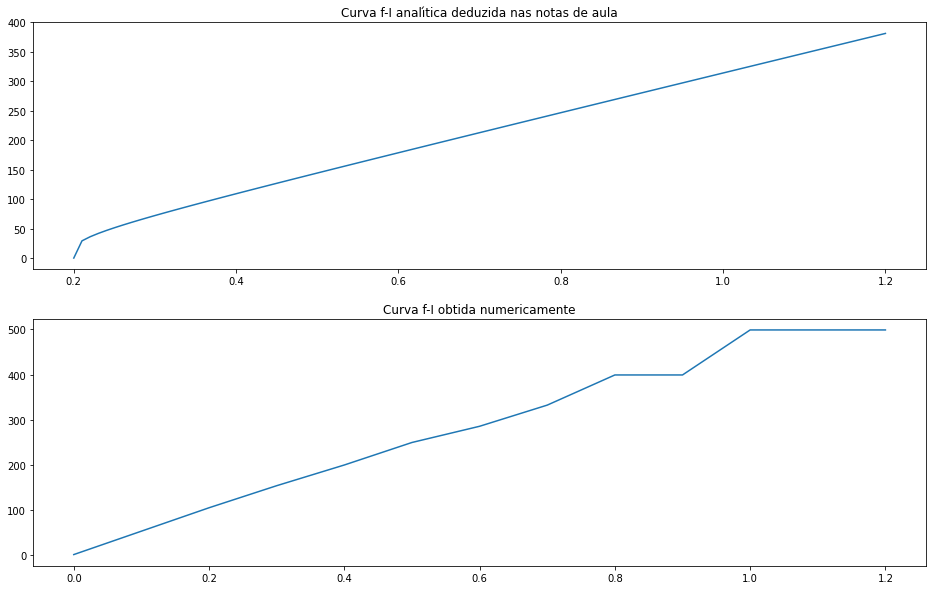

In [5]:
plt.figure(figsize=(16, 10))
plt.subplot(2, 1, 1)
plt.plot(v, F_lif_val)
plt.title("Curva f-I analı́tica deduzida nas notas de aula")

plt.subplot(2, 1, 2)
plt.plot(inj_currents, all_spikes)
plt.title("Curva f-I obtida numericamente")
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<div style="font-family: Times New Roman; font-size: 1.0em;">

<b>Questão 2:</b> <br>

a) Faça o gráfico de f-I para o modelo com ruı́do para dois valores diferentes de σ. Para
fazer isso, vá aumentando o valor de σ a partir de zero até notar que a curva f-I começa
a ficar diferente da curva para σ = 0. Este será o seu primeiro valor de σ. Depois,
continue aumentando σ até notar outra mudança significativa na curva f-I. Este será o
seu segundo valor de σ. Apresente os gráficos de f-I para os dois valores de σ e explique
o que é observado.<br>

Os dois σ's escolhidos foram de 70 e 400. Neste dois pontos, pode-se observar um tendência de não linearidade no aumento dos disparos na curva f-I. <br>
O motivo disto deve-se que a medida que aumentamos o valor de σ aumentamos a quantidade de ruído que ocorre na frequência de disparos do neurônio.

</div>

In [6]:
from Integra_Dispara_noise import IntegraDisparaNoise

100%|██████████| 2000/2000 [00:00<00:00, 590747.04it/s]


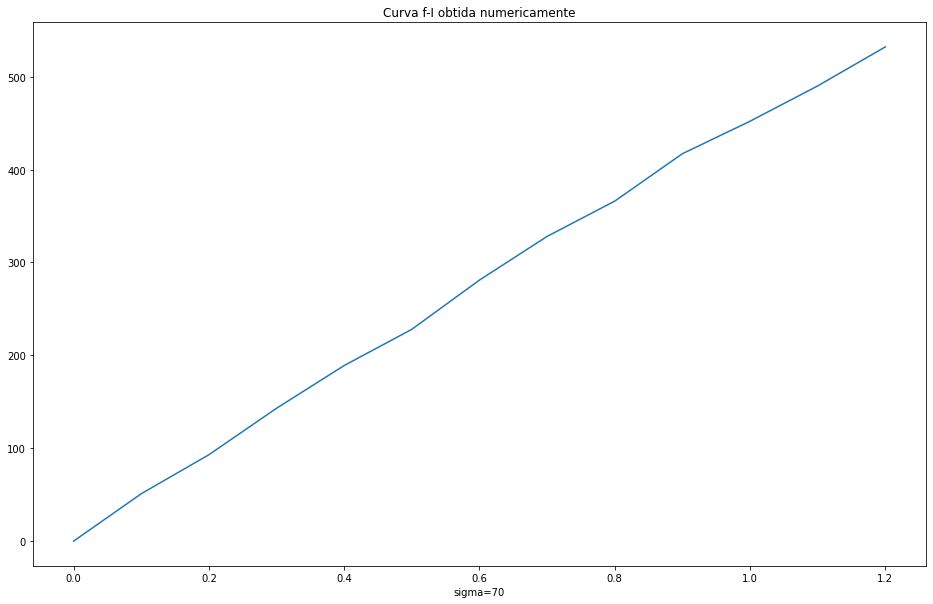

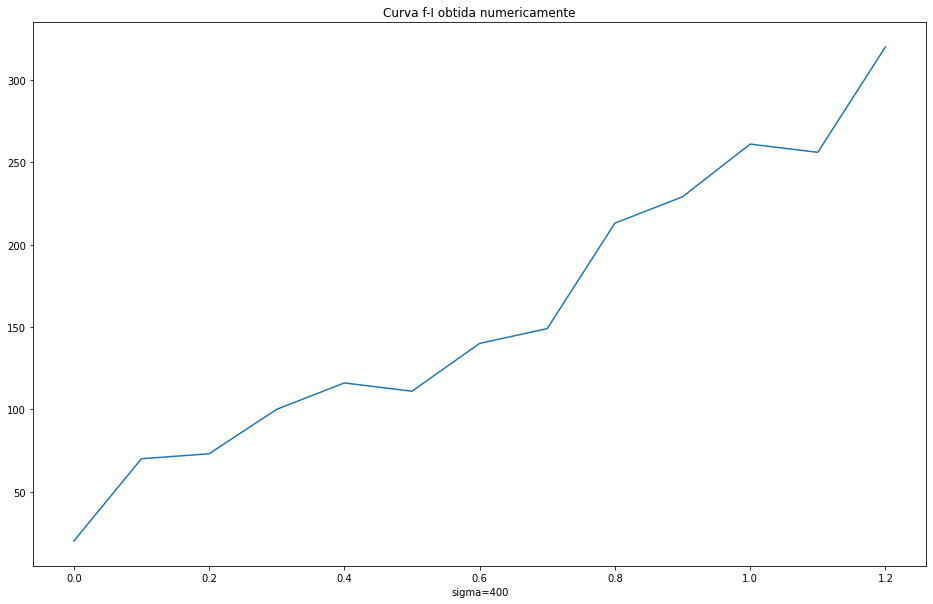

In [7]:
sigmas = [70, 400]

for sigma in sigmas:
    runner = IntegraDisparaNoise(exp_time=2, sigma=sigma)
    all_spikes = []
    for j in inj_currents:
        V, inj_values = runner.run(J=[j], times=[(0, 2)], plot=False)
        spikes = len(count_spikes(V, -50))
        all_spikes.append(spikes)

    plt.figure(figsize=(16, 10))
    plt.plot(inj_currents, all_spikes)
    plt.title("Curva f-I obtida numericamente")
    plt.xlabel(f"sigma={round(sigma, 2)}")


<div style="font-family: Times New Roman; font-size: 1.0em;">

b) Nos comentários relacionados à equação (8.8) de seu livro, Gerstner et al. dizem que,
independentemente da amplitude do ruı́do, a trajetória da voltagem V (t) para um dado valor de I torna-se suave quando ∆t → 0. Faça um estudo do efeito do tamanho do
passo de tempo ∆t sobre a “rugosidade” da trajetória sublimiar de V (t). Para isso,
escolha um valor fixo de I que não seja suficiente para fazer que o neurônio sem ruı́do
dispare (por exemplo, I = 300 pA) e gere diferentes trajetórias de V (t) para um mesmo
valor de σ (pode ser um dos dois valores que você usou no item anterior). Cada uma
das trajetórias deve ser obtida integrando a equação (3) com um passo de tempo ∆t
cada vez menor (comece com o valor de ∆t usado no item anterior e vá diminuindo por
fatores de 10: ∆t/10, ∆t/100, · · · ; tente ir até o menor valor de ∆t que você conseguir).
Mostre todas as trajetórias obtidas em um mesmo gráfico, com uma cor diferente para
cada traçado. O que você pode concluir de seu resultado?.<br>


É possível ver uma pequena convergencia na trajetória de V(t) a medida que diminuímos o valor de ∆t. Mas pelo menos para os valores testados não parece uma convergência tão acentuada.

</div>

100%|██████████| 2000/2000 [00:00<00:00, 409460.05it/s]


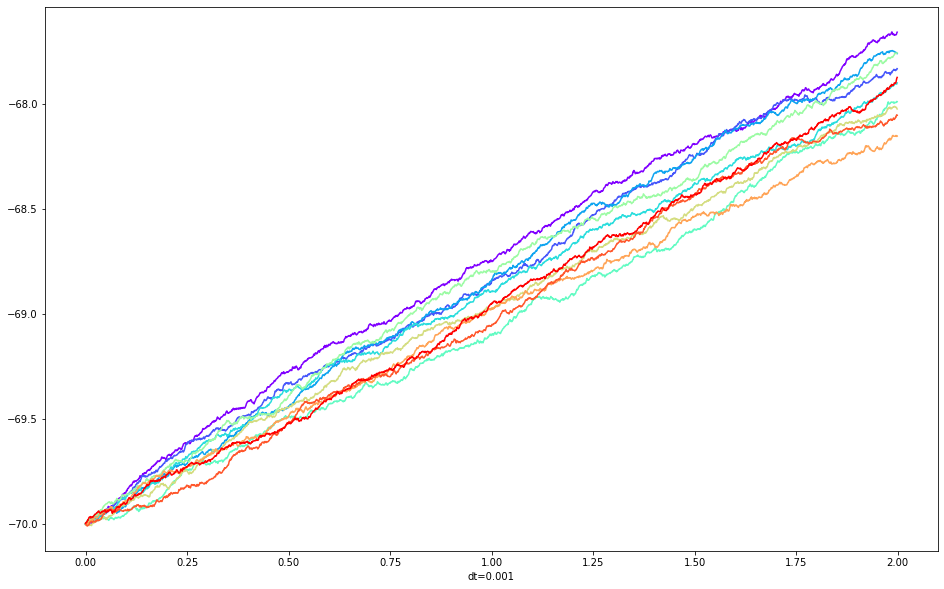

100%|██████████| 20000/20000 [00:00<00:00, 674390.46it/s]


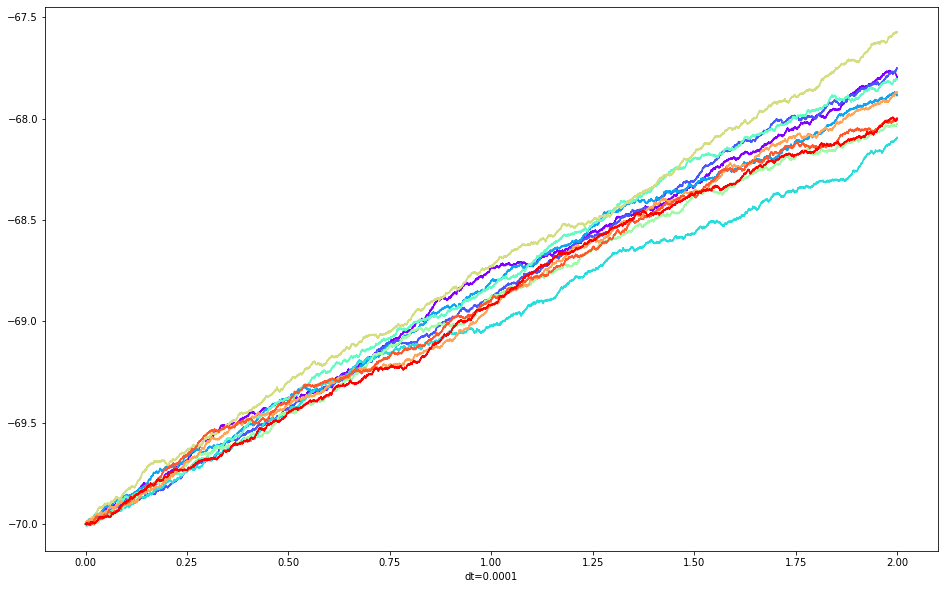

100%|██████████| 200000/200000 [00:00<00:00, 677724.37it/s]


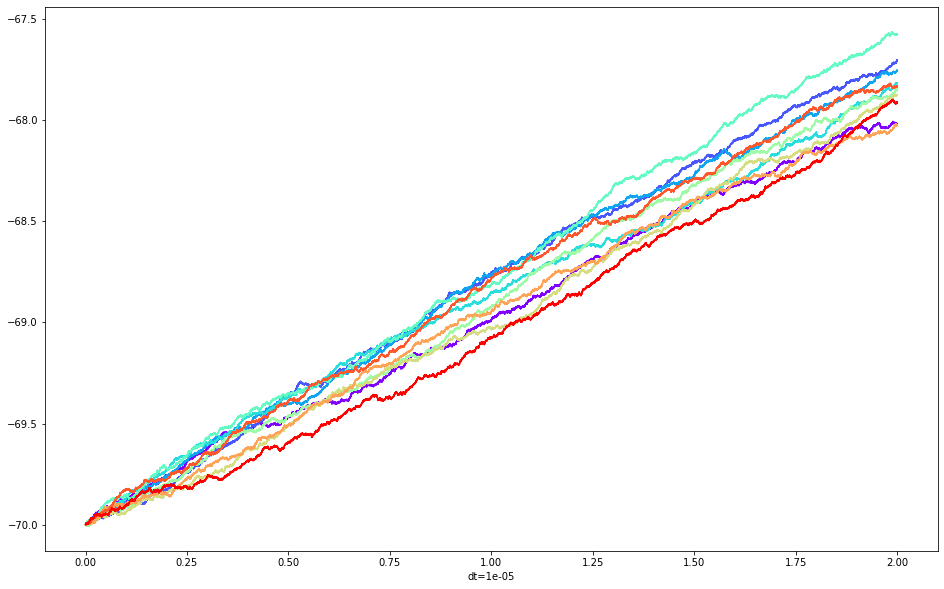

100%|██████████| 2000000/2000000 [00:02<00:00, 703460.19it/s]


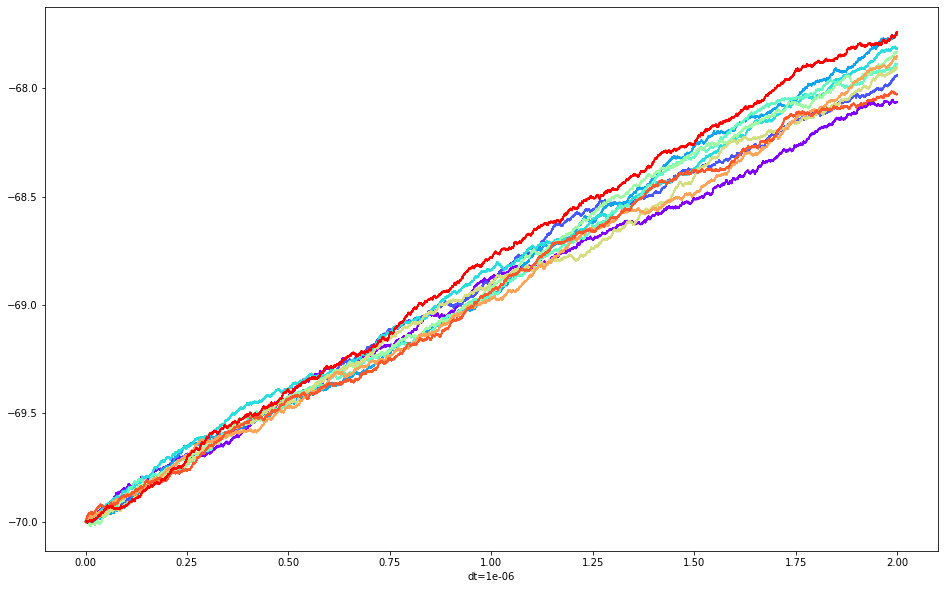

In [8]:
all_dts = [1e-6, 1e-5, 1e-4, 1e-3]
sample_number = 10 
cmap = plt.cm.get_cmap("rainbow", sample_number)

for dt in all_dts[::-1]:
    runner = IntegraDisparaNoise(exp_time=2, dt=dt, sigma=0.1)
    all_v_trajectories = []

    for i in range(sample_number):
        V, inj_values = runner.run(J=[0.0003], times=[(0, 2)], plot=False)
        all_v_trajectories.append(V)

    plt.figure(figsize=(16, 10))

    for i in range(sample_number):
        plt.plot(runner.t, all_v_trajectories[i], color=cmap(i)[:-1])
    plt.xlabel(f"dt={round(dt, 6)}")
    plt.show()


<div style="font-family: Times New Roman; font-size: 1.0em;">

c) A irregularidade do trem de disparos de um neurônio pode ser quantificada de diferen-
tes maneiras. Uma delas é pelo coeficiente de variação dos intervalos entre disparos,
CV ISI , definido como o desvio padrão dos ISIs dividido pela média dos ISIs. Para um
neurônio hipotético cujos disparos seguem um processo de Poisson homogêneo, pode-se
mostrar que a distribuição dos intervalos entre disparos é exponencial e que CV ISI = 1.
Um neurônio desse tipo, chamado de neurônio poissoniano, é normalmente usado como
controle para comparação com outros modelos de neurônios. Quanto mais próximo de
1 for o CV ISI do modelo de neurônio, mais próximo ele estará do neurônio poissoniano
e mais irregulares serão os seus disparos. Escolha um valor grande para a amplitude do
ruı́do σ (por exemplo, o segundo valor do item (a)) e rode a simulação do seu modelo de
neurônio com ruı́do por 2 s com dois valores diferentes de corrente constante I (e mesmo
valor de σ): um acima de I L (vamos chamá-lo de I acima ) e outro abaixo de I L (vamos
chamá-lo de I abaixo ), onde I L é a corrente limiar para o caso sem ruı́do. Por exemplo, use
I acima = 550 pA e I abaixo = 450 pA. Gere gráficos para os dois casos como na Figura 5.21
do livro de Dayan e Abbott (pg. 190) citado nas referências da disciplina no arquivo de
roteiro (um pdf do livro foi colocado no Google Classroom): para cada caso, gere dois
gráficos de V × t, um em cima do outro; coloque no gráfico superior a curva de V (t)
sem considerar que o neurônio emite disparos quando a curva cruza o limiar (represente
o limiar no gráfico por uma linha tracejada); e no gráfico inferior coloque a curva de
V (t) usual, com os disparos postos à mão quando a voltagem atinge o limiar vindo de
baixo. Use os gráficos inferiores (aqueles que mostram os disparos) para determinar os
instantes dos disparos nos dois casos e, a partir deles, os ISIs respectivos. Tendo os ISIs,
calcule o valor médio e o desvio padrão deles e obtenha o CV ISI para cada caso. Como
eles se comparam? Em qual dos dois casos os disparos do neurônio são mais irregulares?
Explique o motivo da diferença observada (para isso, será útil ler a Seção Regular and
Irregular Firing Modes do livro de Dayan e Abbott (pgs. 189-191). Nota: dependendo
do valor de σ utilizado, pode ser que você precise usar valores de I acima e I abaixo diferentes
dos sugeridos acima. Faça alguns testes para encontrar valores que gerem gráficos mais
ou menos parecidos com os da Figura 5.21 do livro de Dayan e Abbott.<br>

O CVisi para a corrente de 0.01 deu 0.36 enquanto o com a corrente 0.1 deu 0.63. <br>
Com a corrente de 0.01 os disparos são mais irregulares. Esta irregularidade dos disparos deve-se ao fato de que o fator sigma passa a ser preponderante na ocorrência ou não de um disparo, ocasionando assim uma aleatóriedade muito grande. 

</div>

100%|██████████| 2000/2000 [00:00<00:00, 406090.33it/s]


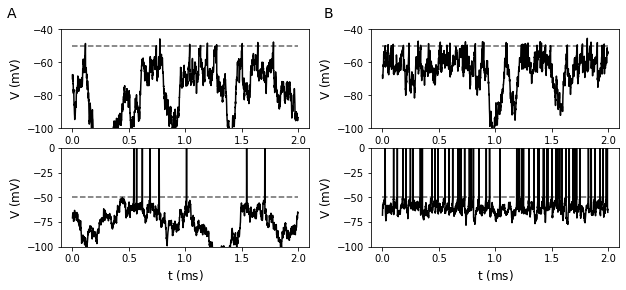

In [9]:
inj_currents = [0.01, 0.1]

runner = IntegraDisparaNoise(exp_time=2, dt=1e-3, sigma=70)
fig, ax = plt.subplots(2, 2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.25)

V_subs = []

for i, i_j in enumerate(inj_currents):
    V, inject_values = runner.run(J=[i_j], times=[(0, 2)], plot=False)

    ax[0][i].plot(runner.t, V, color="black")
    ax[0][i].plot([0, 2], [-50, -50] , 'k--', alpha = 0.6)
    ax[0][i].set_ylabel(r'$\mathrm{V~(mV)}$', weight='bold', fontsize=12)
    ax[0][i].set_ylim([-100, -40])

    V, inject_values = runner.run(J=[i_j], times=[(0, 2)], spikes=True, plot=False)

    ax[1][i].plot(runner.t, V, color="black")
    ax[1][i].plot([0, 2], [-50, -50] , 'k--', alpha = 0.6)
    ax[1][i].set_ylabel(r'$\mathrm{V~(mV)}$', weight='bold', fontsize=12)
    ax[1][i].set_ylim([-100, 0])
    ax[1][i].set_xlabel(r'$\mathrm{t~(ms)}$', weight='bold', fontsize=12)
    V_subs.append(V)
fig.text(0.05, 0.92, 'A', fontsize=14)
fig.text(0.49, 0.92, 'B', fontsize=14)

plt.show()

In [10]:
times_0 = count_spikes(V_subs[0], -50)
times_1 = count_spikes(V_subs[1], -50)

round(np.std(times_0) / np.mean(times_0), 2), round(np.std(times_1) / np.mean(times_1), 2)

(0.46, 0.54)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<div style="font-family: Times New Roman; font-size: 1.0em;">

<b>Questão 3:</b> <br>

a) Simule o modelo de neurônio por 1,5 s com um pulso de corrente I = 501 pA aplicado
de t = 0, 5 s a t = 1, 0 s. Coloque os seus resultados em uma figura composta por três
gráficos, um dando a corrente aplicada I em função do tempo, outro dando o potencial
de membrana V em função do tempo, e o terceiro dando a condutância de adaptação
G a em função do tempo. Faça com que os gráficos fiquem um em cima do outro para
facilitar a comparação.<br>
</div>

In [11]:
from Integra_Dispara_IAdap import IntegraDisparaIAdap

100%|██████████| 1500/1500 [00:00<00:00, 46014.06it/s]


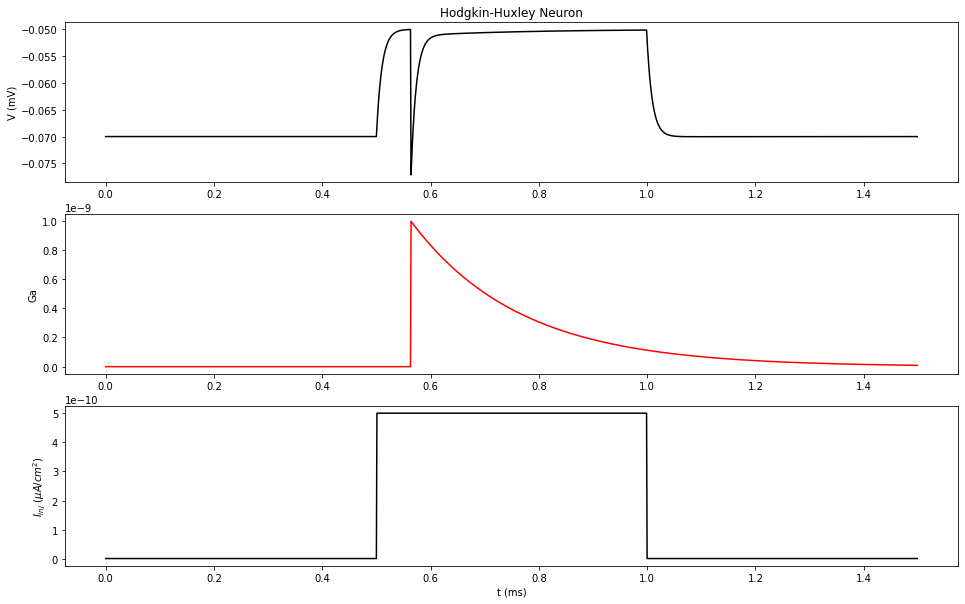

In [12]:
runner = IntegraDisparaIAdap(exp_time=1.5)
_ = runner.run(J=[501e-12], times=[(0.5, 1)])

<div style="font-family: Times New Roman; font-size: 1.0em;">

b) Agora simule o modelo por 5 s usando diferentes valores de corrente injetada constante
I, indo de I = 400 pA a I = 800 pA em incrementos de 20 pA. Para cada corrente
aplicada, calcule o primeiro intervalo entre disparos (T 1 = t 2 − t 1 na notação das notas
de aula) e o intervalo entre disparos do regime estacionário (isto é, depois do perı́odo
transiente) T ∞ . Faça um gráfico mostrando as curvas f-I obtidas pelo inverso de T 1 (f 1 )
e pelo inverso de T ∞ (f ∞ ), representadas por sı́mbolos ou cores diferentes. O modelo
simulado é de tipo I ou de tipo II?<br>

Como podemos verificar com uma corrente injetada pequena o modelo é capaz de produzir um trem de disparos. Logo, ele é do tipo II.
</div>

In [13]:
def time_between_spikes(time_spikes):
    """Calculates the time between spikes.
    Parameters
    ----------
    time_spikes : numpy.ndarray
        Times of spikes.
    Returns
    -------
    time_between_spikes : numpy.ndarray
        Time between spikes.
    """
    time_between_spikes = time_spikes[1:] - time_spikes[:-1]
    return time_between_spikes


In [15]:
inj_currents = np.arange(400e-12, 801e-12, 20e-12)

runner = IntegraDisparaIAdap(exp_time=5)

all_T1 = []
all_Tinf = []

for i_j in inj_currents:

    V, _, _ = runner.run(J=[i_j], times=[(0, 5)], plot=False)
    time_spikes = count_spikes(V, -0.050)
    
    t_spikes = time_between_spikes(time_spikes)
    t_spikes_inf = time_between_spikes(time_spikes)
    
    try:
        all_T1.append(1/t_spikes[0])
        all_Tinf.append(1/t_spikes[-1])
    except:
        all_T1.append(0)
        all_Tinf.append(0)

    print(f"J = {i_j}")

100%|██████████| 5000/5000 [00:00<00:00, 62677.89it/s]


J = 4e-10


100%|██████████| 5000/5000 [00:00<00:00, 53441.52it/s]


J = 4.2e-10


100%|██████████| 5000/5000 [00:00<00:00, 61780.33it/s]


J = 4.4e-10


100%|██████████| 5000/5000 [00:00<00:00, 61822.59it/s]


J = 4.5999999999999996e-10


100%|██████████| 5000/5000 [00:00<00:00, 63740.12it/s]


J = 4.8e-10


100%|██████████| 5000/5000 [00:00<00:00, 60254.85it/s]


J = 4.999999999999999e-10


100%|██████████| 5000/5000 [00:00<00:00, 61162.32it/s]


J = 5.199999999999999e-10


100%|██████████| 5000/5000 [00:00<00:00, 60547.11it/s]


J = 5.399999999999999e-10


100%|██████████| 5000/5000 [00:00<00:00, 60793.18it/s]


J = 5.599999999999999e-10


100%|██████████| 5000/5000 [00:00<00:00, 59427.76it/s]


J = 5.799999999999999e-10


100%|██████████| 5000/5000 [00:00<00:00, 58759.55it/s]


J = 5.999999999999998e-10


100%|██████████| 5000/5000 [00:00<00:00, 60414.02it/s]


J = 6.199999999999998e-10


100%|██████████| 5000/5000 [00:00<00:00, 60502.56it/s]


J = 6.399999999999999e-10


100%|██████████| 5000/5000 [00:00<00:00, 61203.55it/s]


J = 6.599999999999998e-10


100%|██████████| 5000/5000 [00:00<00:00, 59165.37it/s]


J = 6.799999999999997e-10


100%|██████████| 5000/5000 [00:00<00:00, 61522.97it/s]


J = 6.999999999999998e-10


100%|██████████| 5000/5000 [00:00<00:00, 58645.52it/s]


J = 7.199999999999998e-10


100%|██████████| 5000/5000 [00:00<00:00, 61452.84it/s]


J = 7.399999999999997e-10


100%|██████████| 5000/5000 [00:00<00:00, 62255.52it/s]


J = 7.599999999999997e-10


100%|██████████| 5000/5000 [00:00<00:00, 62796.88it/s]


J = 7.799999999999997e-10


100%|██████████| 5000/5000 [00:00<00:00, 63295.54it/s]

J = 7.999999999999997e-10


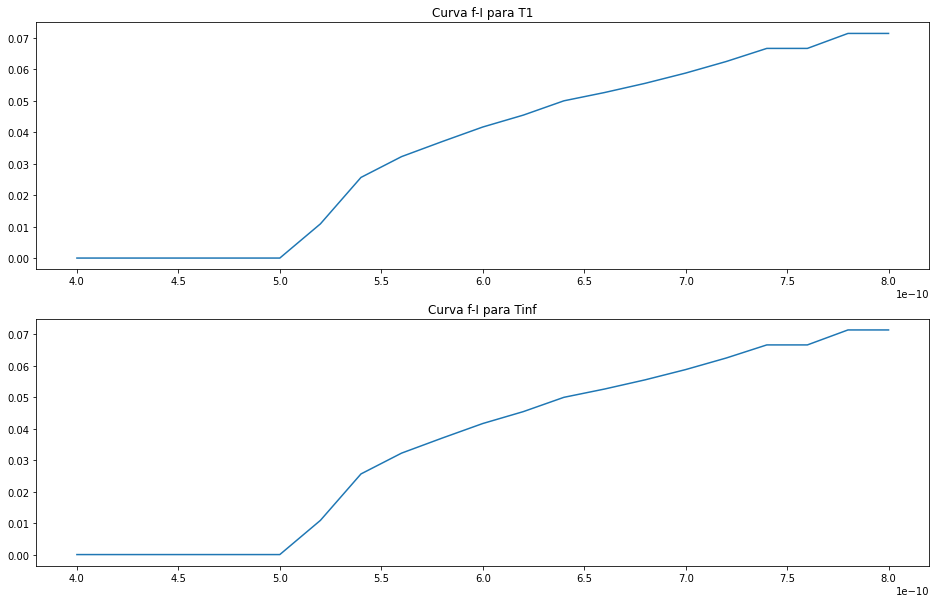

In [16]:
plt.figure(figsize=(16, 10))
plt.subplot(2, 1, 1)
plt.plot(inj_currents, all_T1)
plt.title("Curva f-I para T1")

plt.subplot(2, 1, 2)
plt.plot(inj_currents, all_Tinf)
plt.title("Curva f-I para Tinf")
plt.show()